# Optical Properties Demo Code

The BIOMASS BURNING OBSERVATION PROJECT (BBOP) was designed to have observations on aerosols properties to better understanding about aerosols emissions and its uncertainties over the Pacific Northwest (PNW). This field campaign leveraged the capabilities of several instruments having the primary measurements of optical, physical, and chemical properties of aerosols including aerosol extensive and intensive properties. In this exercise, we plan to use light absorption measurements from Particle Soot Absorption Photometer (PSAP) and light scattering measurements from Nephelometer at multiple wavelengths.

### Instructions
(a)	 Open the combined data file provided to you using a suitable editor.

(b)	 Look on the columns headers (listed below). Get familiar with the ‘absorption’ and ‘scattering fields’ to the data files

(c)	See the magnitude of the absorption and scattering coefficients from different wavelengths.

(d)	 How the absorption and scattering coefficients changes with wavelengths.

(e)	 Estimate at least two intensive optical properties from the above data sets

(f)	Do you see any relationship in RH with scattering coefficients? 


In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_table('BBOP_20130816a_A2.dat', delimiter = '\s+', header = None, names = ['decimal_time', 'hh', 'mm', 'ss', 
                                                                                       'tbs_tr_corr', 'tgs_tr_corr',
                                                                                       'trs_tr_corr', 'bbs_tr_corr', 'bgs_tr_corr', 'brs_tr_corr', 
                                                                                       'tba_corr', 'tga_corr', 'tra_corr', 'neph_P', 'neph_T', 
                                                                                       'neph_R', 'F_cld'])
df.index = pd.to_datetime('2013-08-16 ' + df.hh.astype(int).astype(str) + ':' + df.mm.astype(int).astype(str) + ':' + df.ss.astype(int).astype(str))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_67404/103789022.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table('BBOP_20130816a_A2.dat', delimiter = '\s+', header = None, names = ['decimal_time', 'hh', 'mm', 'ss',


In [24]:
df = df[df > -9999] # Quality check

Text(0.5, 1.0, 'Corrected absorption coefficient')

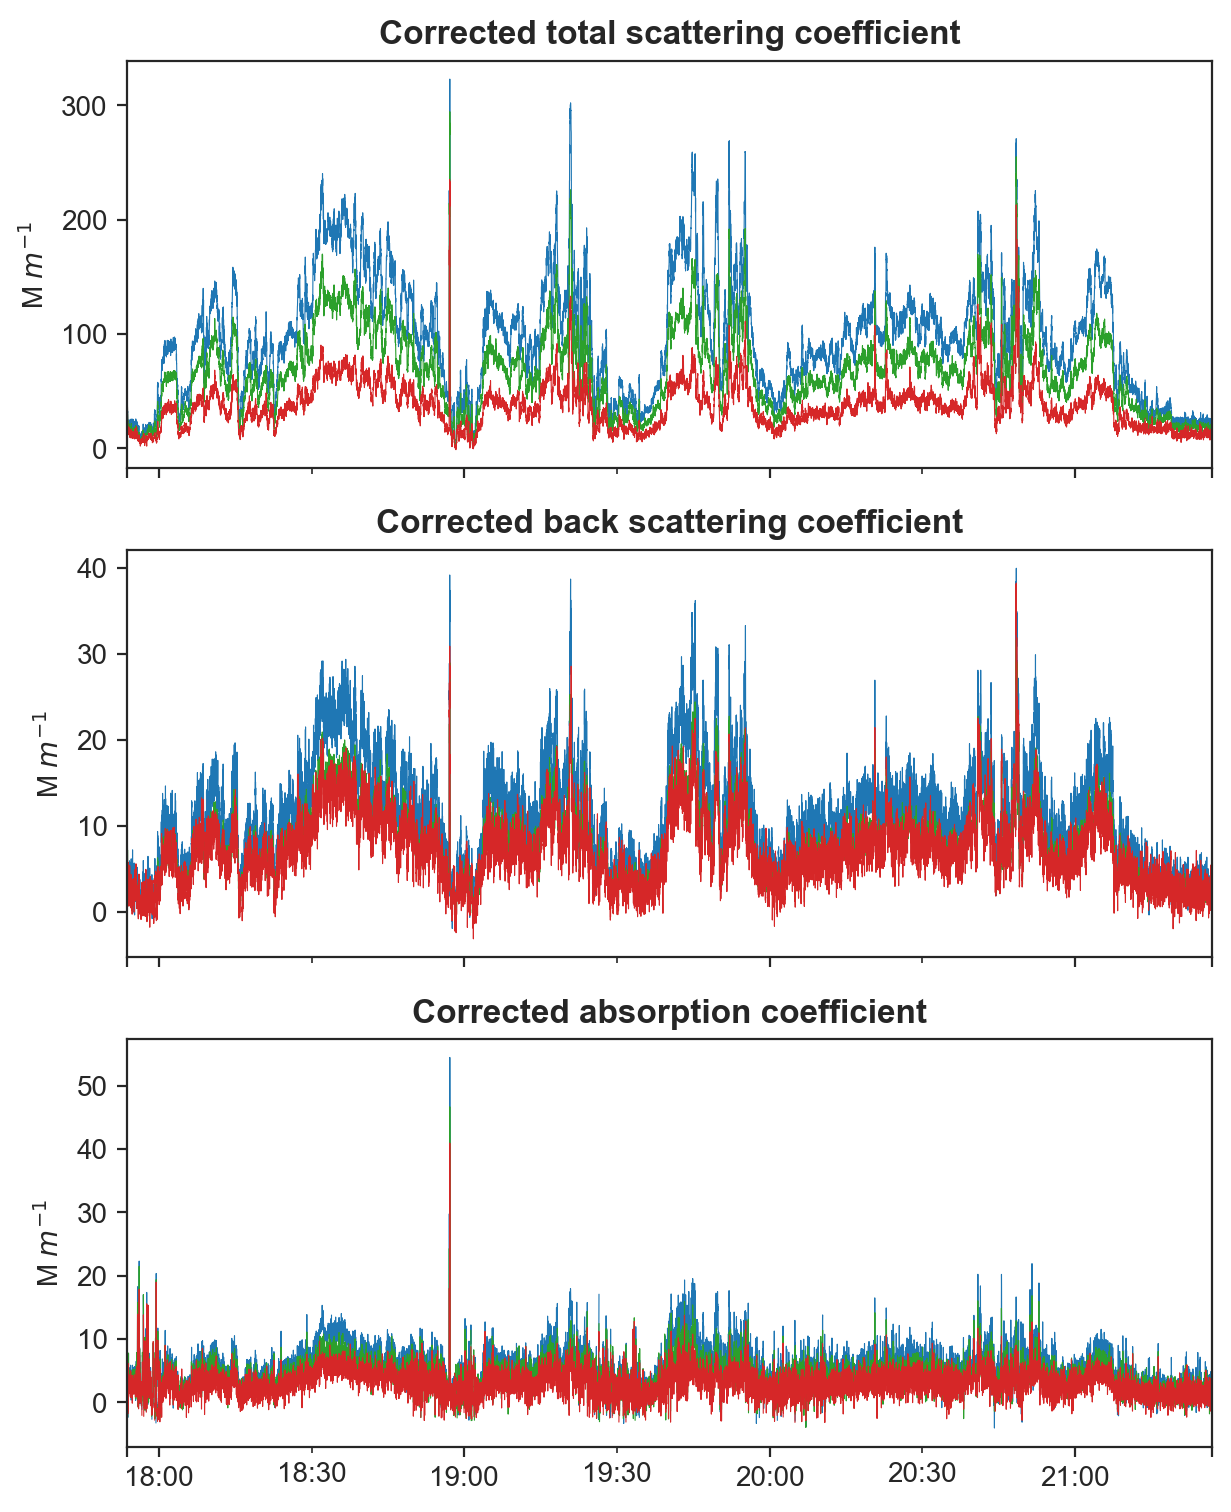

In [25]:
fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, figsize = (7,9))

df['tbs_tr_corr'].plot(ax = ax, color = 'tab:blue', lw = 0.4)
df['tgs_tr_corr'].plot(ax = ax, color = 'tab:green', lw = 0.4)
df['trs_tr_corr'].plot(ax = ax, color = 'tab:red', lw = 0.4)
ax.set_ylabel('M $m^{-1}$')
ax.set_title('Corrected total scattering coefficient', weight = 'bold')
                                   
df['bbs_tr_corr'].plot(ax = ax2, color = 'tab:blue', lw = 0.4)
df['bgs_tr_corr'].plot(ax = ax2, color = 'tab:green', lw = 0.4)
df['brs_tr_corr'].plot(ax = ax2, color = 'tab:red', lw = 0.4)
ax2.set_ylabel('M $m^{-1}$')
ax2.set_title('Corrected back scattering coefficient', weight = 'bold')

df['tba_corr'].plot(ax = ax3, color = 'tab:blue', lw = 0.4)
df['tga_corr'].plot(ax = ax3, color = 'tab:green', lw = 0.4)
df['tra_corr'].plot(ax = ax3, color = 'tab:red', lw = 0.4)
ax3.set_ylabel('M $m^{-1}$')
ax3.set_title('Corrected absorption coefficient', weight = 'bold')

In [26]:
df['ssa_green'] = df['tgs_tr_corr'] / (df['tgs_tr_corr'] + df['tga_corr'])
df['ssa_red'] = df['trs_tr_corr'] / (df['trs_tr_corr'] + df['tra_corr'])
df['ssa_blue'] = df['tbs_tr_corr'] / (df['tbs_tr_corr'] + df['tba_corr'])

In [27]:
df['sae_sc'] = np.log10(df['tbs_tr_corr'] / df['trs_tr_corr']) / np.log10(700 / 450)
df['sae_abs'] = np.log10(df['tba_corr'] / df['tra_corr']) / np.log10(700 / 450)

/opt/anaconda3/envs/clars/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Single scattering albedo
0.001 or 0.002 changes in SSA can have a huge impact on total radiative forcing in climate models! This is also dependent on where we are, aerosols, surface albedo, etc...

$$ SSA = \frac{scattering}{scattering + absorption} $$
at each wavelength!

Text(0.5, 1.0, 'SSA, blue')

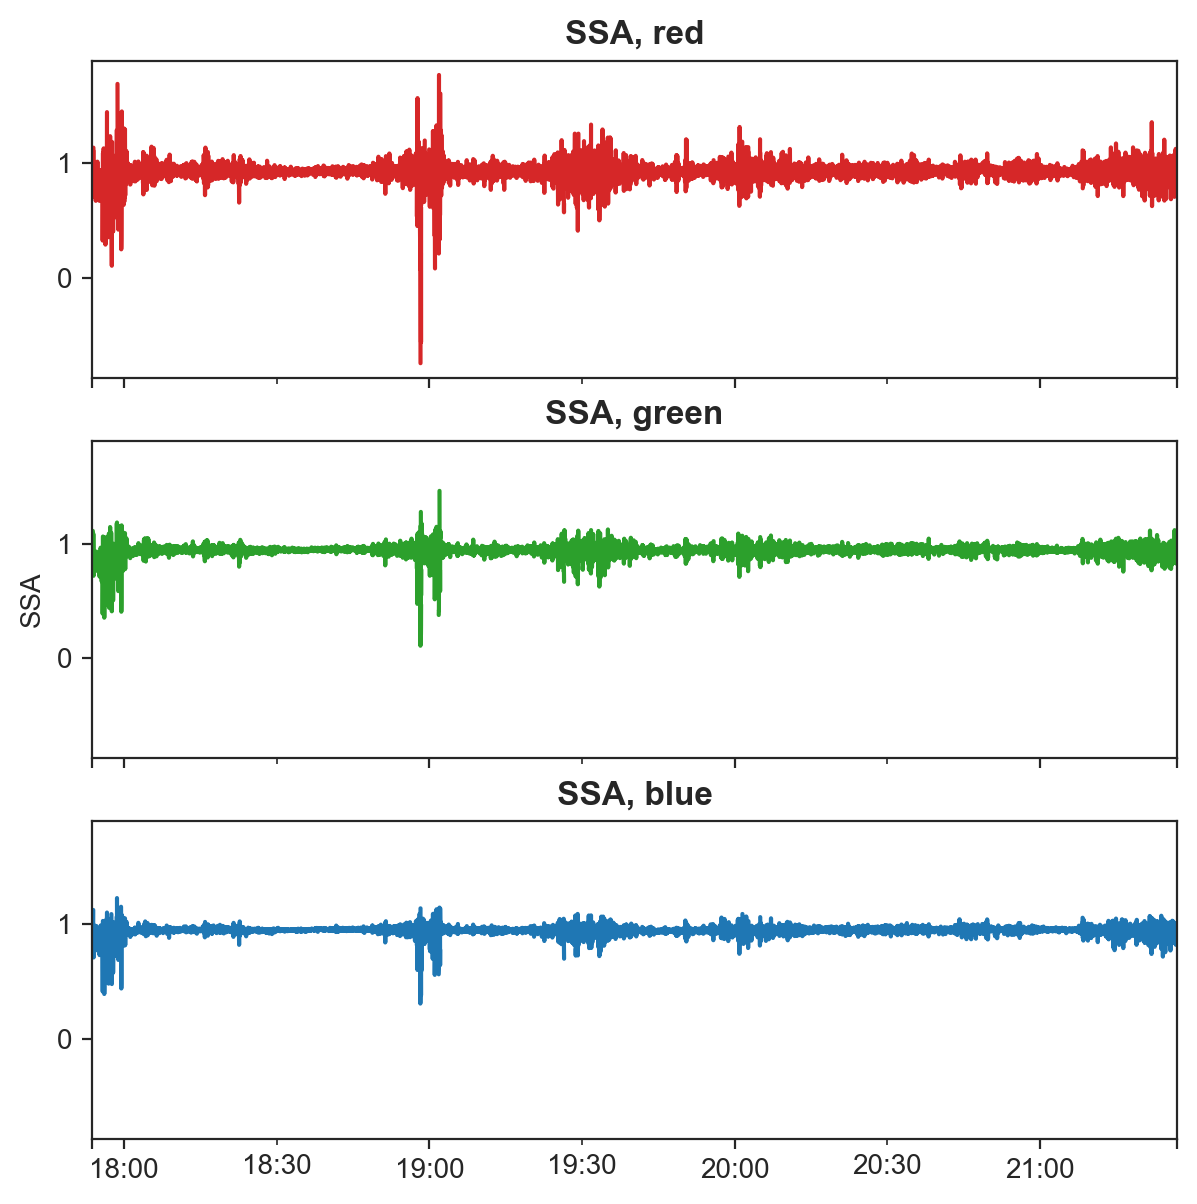

In [28]:
fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, sharey = True, figsize = (7,7))

df['ssa_red'].plot(ax = ax, color = 'tab:red')
ax.set_title('SSA, red', weight = 'bold')
ax2.set_ylabel('SSA')

df['ssa_green'].plot(ax = ax2, color = 'tab:green')
ax2.set_title('SSA, green', weight = 'bold')

df['ssa_blue'].plot(ax = ax3, color = 'tab:blue')
ax3.set_title('SSA, blue', weight = 'bold')

Text(0.5, 1.0, 'SSA, blue:  0.941')

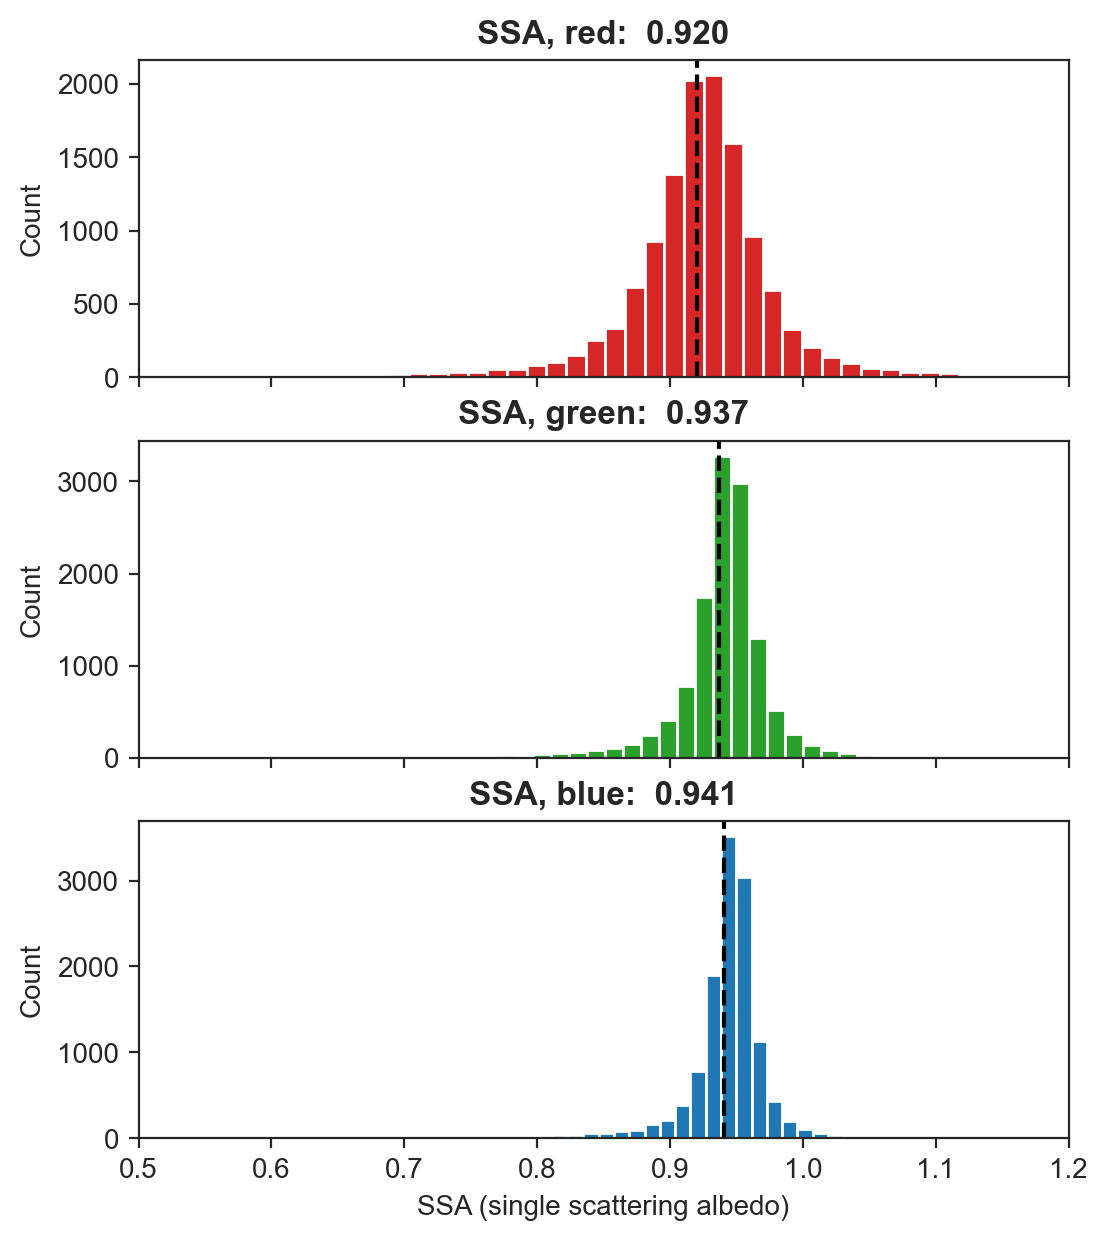

In [29]:
fig, (ax, ax2, ax3) = plt.subplots(3, 1, sharex = True, figsize = (6,7))

ax.hist(df['ssa_red'], bins = 170, color = 'tab:red')
ax2.hist(df['ssa_green'], bins = 100, color = 'tab:green')
ax3.hist(df['ssa_blue'], bins = 80, color = 'tab:blue')

ax.axvline(np.mean(df['ssa_red']), ls = 'dashed', color = 'black')
ax2.axvline(np.mean(df['ssa_green']), ls = 'dashed', color = 'black')
ax3.axvline(np.mean(df['ssa_blue']), ls = 'dashed', color = 'black')

ax.set_ylabel('Count')
ax2.set_ylabel('Count')
ax3.set_ylabel('Count')

ax3.set_xlabel('SSA (single scattering albedo)')

ax.set_xlim([0.5,1.2])
ax.set_title(f'SSA, red: {np.mean(df['ssa_red']) : .3f}', weight = 'bold')                                  
ax2.set_title(f'SSA, green: {np.mean(df['ssa_green']) : .3f}', weight = 'bold')
ax3.set_title(f'SSA, blue: {np.mean(df['ssa_blue']) : .3f}', weight = 'bold')

# Angstrom Exponent

To calculate the angstrom exponent,

$$ SAE = \frac{ \log{ \frac {scattering_{B}}{scattering_{R}}  } }{  \log{ \frac{ 700 } { 450} }   } $$


Higher angstrom exponent corresponds to smaller particles. The smallest particles would correspond with Rayleigh scattering, which would be a SAE of 4. The largest particles would have 0.

You can also calculate a AAE (absorption angstrom exponent) using absorbance instead.

Text(0.5, 1.0, 'AAE:  1.429')

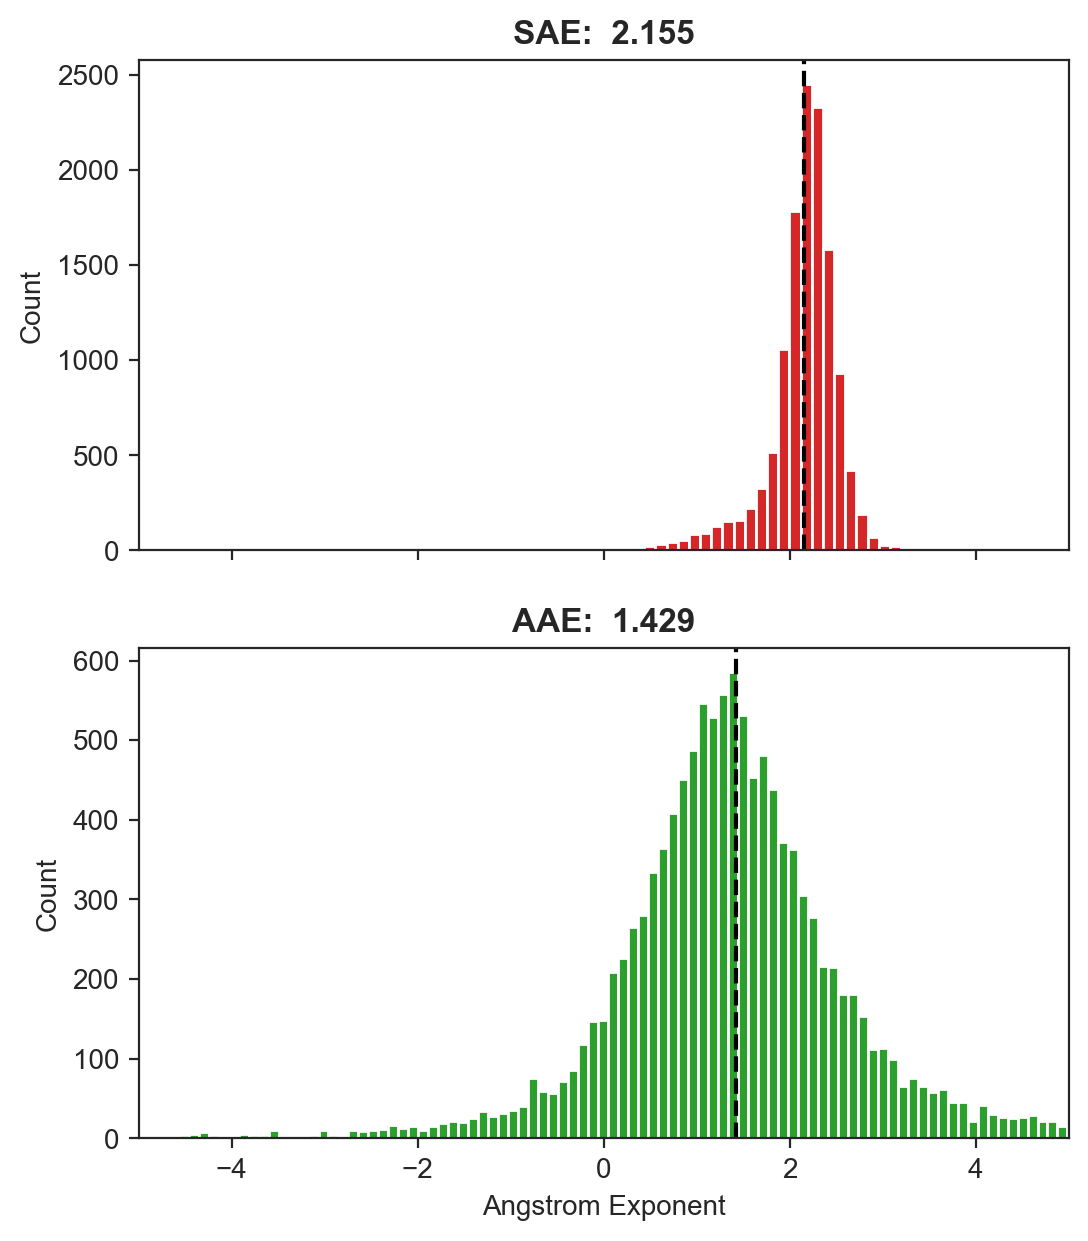

In [30]:
fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize = (6,7))

ax.hist(df['sae_sc'], bins = 100, color = 'tab:red')
ax2.hist(df['sae_abs'], bins = 300, color = 'tab:green')

ax.axvline(np.mean(df['sae_sc']), ls = 'dashed', color = 'black')
ax2.axvline(np.mean(df['sae_abs']), ls = 'dashed', color = 'black')

ax.set_ylabel('Count')
ax2.set_ylabel('Count')
ax2.set_xlabel('Angstrom Exponent')

ax.set_xlim([-5, 5])
ax.set_title(f'SAE: {np.mean(df['sae_sc']) : .3f}', weight = 'bold')                                  
ax2.set_title(f'AAE: {np.mean(df['sae_abs']) : .3f}', weight = 'bold')

# Relative Humidity

$$ f(RH) = \frac{scattering_{RH}}{scattering_{RH_{10}}} $$

Exponential, there is little change in RH above 50%.

Text(0.5, 1.0, 'RH v. corrected total scattering coefficient')

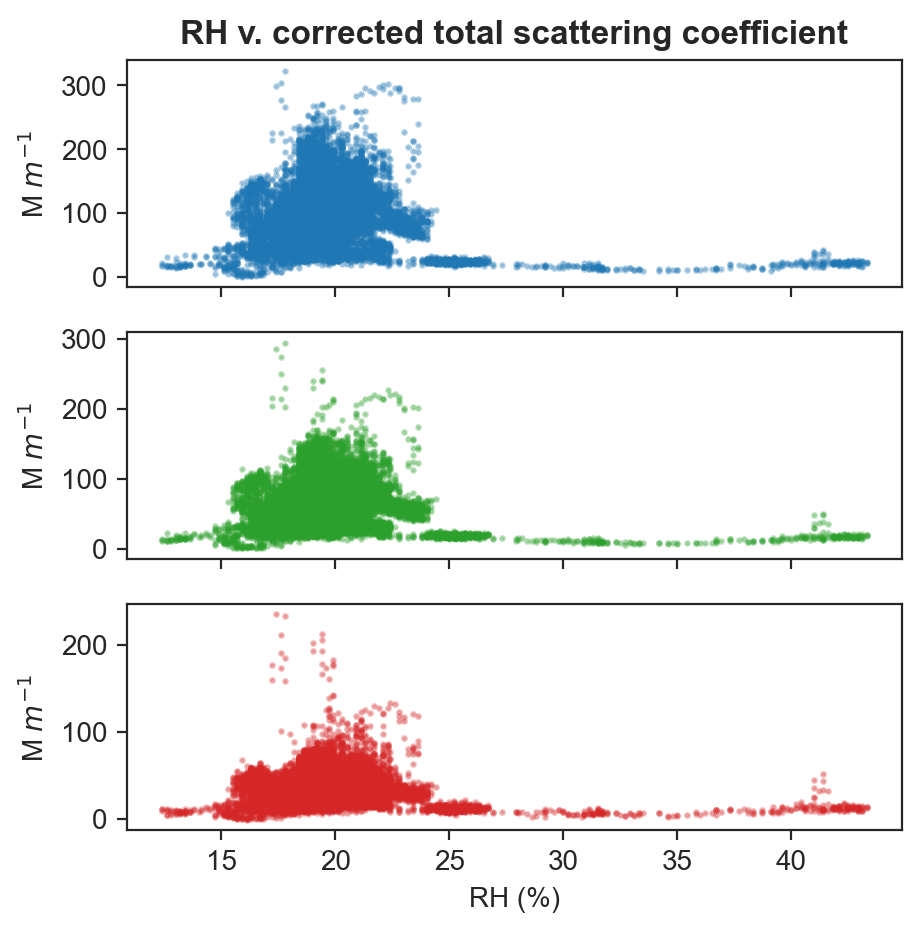

In [31]:
fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, figsize = (5,5))

ax.scatter(df['neph_R'], df['tbs_tr_corr'], s = 2, alpha = 0.3, color = 'tab:blue')
ax2.scatter(df['neph_R'], df['tgs_tr_corr'], s = 2, alpha = 0.3, color = 'tab:green')
ax3.scatter(df['neph_R'], df['trs_tr_corr'], s = 2, alpha = 0.3, color = 'tab:red')

ax.set_ylabel('M $m^{-1}$')
ax2.set_ylabel('M $m^{-1}$')
ax3.set_ylabel('M $m^{-1}$')

ax3.set_xlabel('RH (%)')
ax.set_title('RH v. corrected total scattering coefficient', weight = 'bold')

Text(0.5, 1.0, 'RH v. corrected backscattering coefficient')

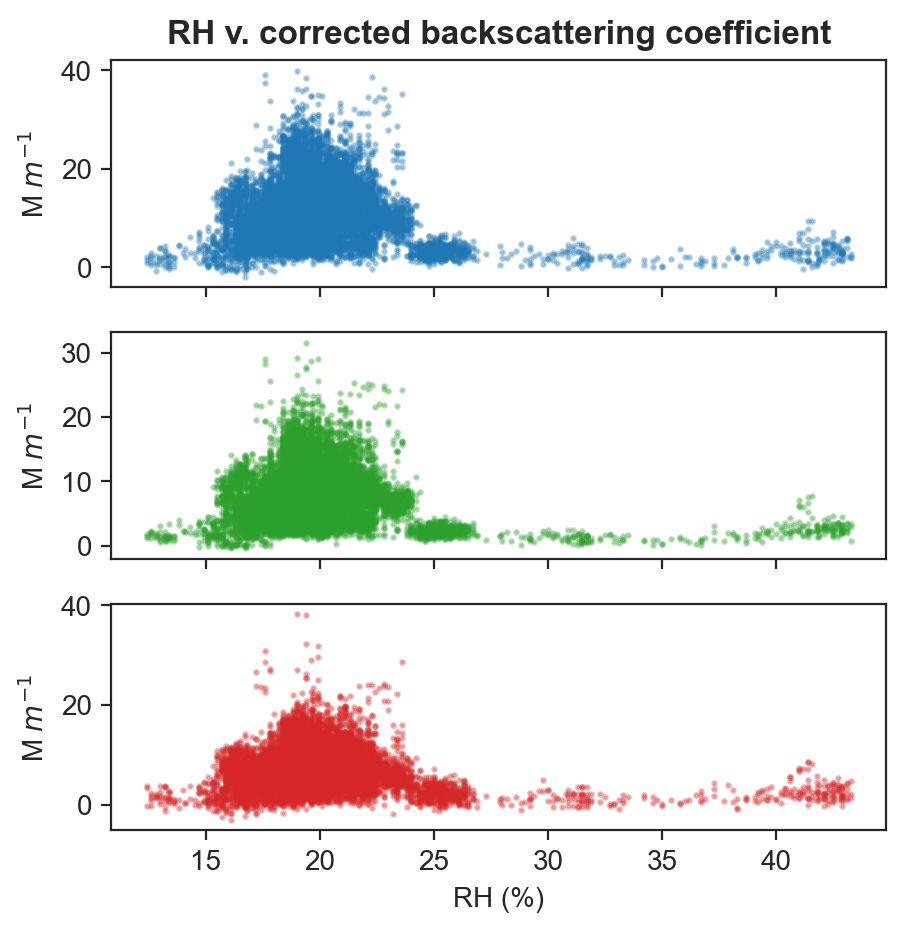

In [32]:
fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, figsize = (5,5))

ax.scatter(df['neph_R'], df['bbs_tr_corr'], s = 2, alpha = 0.3, color = 'tab:blue')
ax2.scatter(df['neph_R'], df['bgs_tr_corr'], s = 2, alpha = 0.3, color = 'tab:green')
ax3.scatter(df['neph_R'], df['brs_tr_corr'], s = 2, alpha = 0.3, color = 'tab:red')

ax.set_ylabel('M $m^{-1}$')
ax2.set_ylabel('M $m^{-1}$')
ax3.set_ylabel('M $m^{-1}$')

ax3.set_xlabel('RH (%)')
ax.set_title('RH v. corrected backscattering coefficient', weight = 'bold')

Text(0.5, 1.0, 'RH v. absorption coefficient')

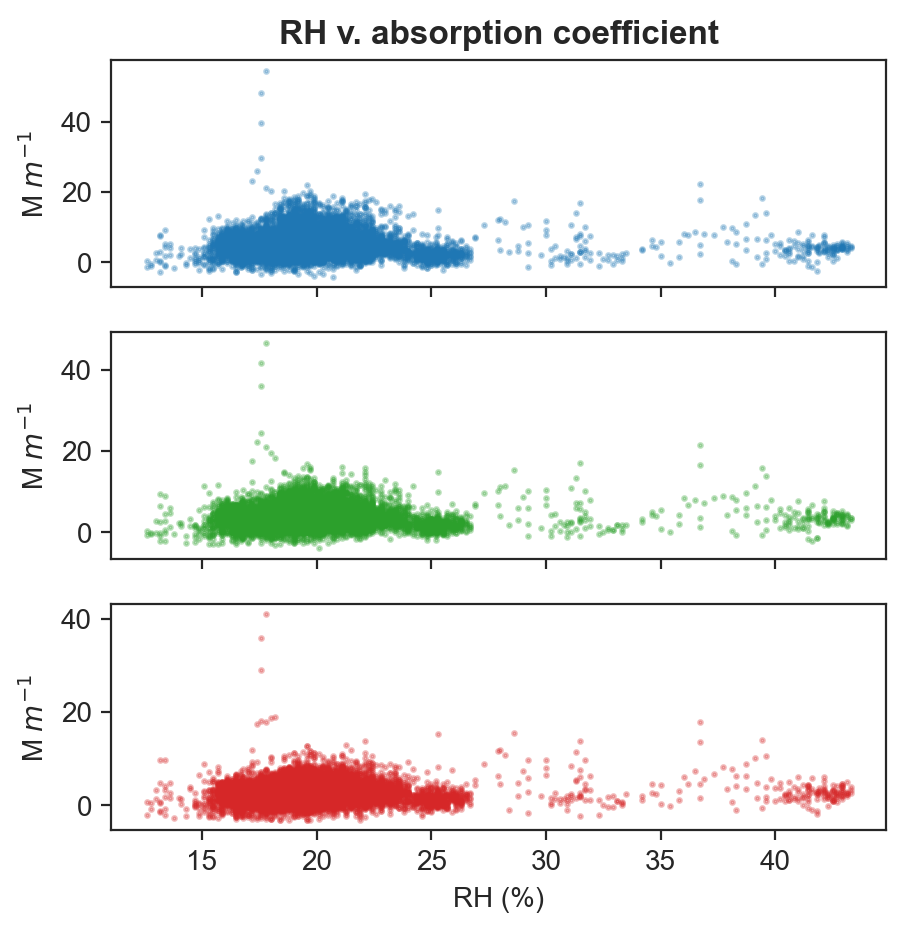

In [33]:
fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, figsize = (5,5))

ax.scatter(df['neph_R'], df['tba_corr'], s = 2, alpha = 0.3, color = 'tab:blue')
ax2.scatter(df['neph_R'], df['tga_corr'], s = 2, alpha = 0.3, color = 'tab:green')
ax3.scatter(df['neph_R'], df['tra_corr'], s = 2, alpha = 0.3, color = 'tab:red')

ax.set_ylabel('M $m^{-1}$')
ax2.set_ylabel('M $m^{-1}$')
ax3.set_ylabel('M $m^{-1}$')

ax3.set_xlabel('RH (%)')
ax.set_title('RH v. absorption coefficient', weight = 'bold')

Text(0.5, 1.0, 'RH v. SSA')

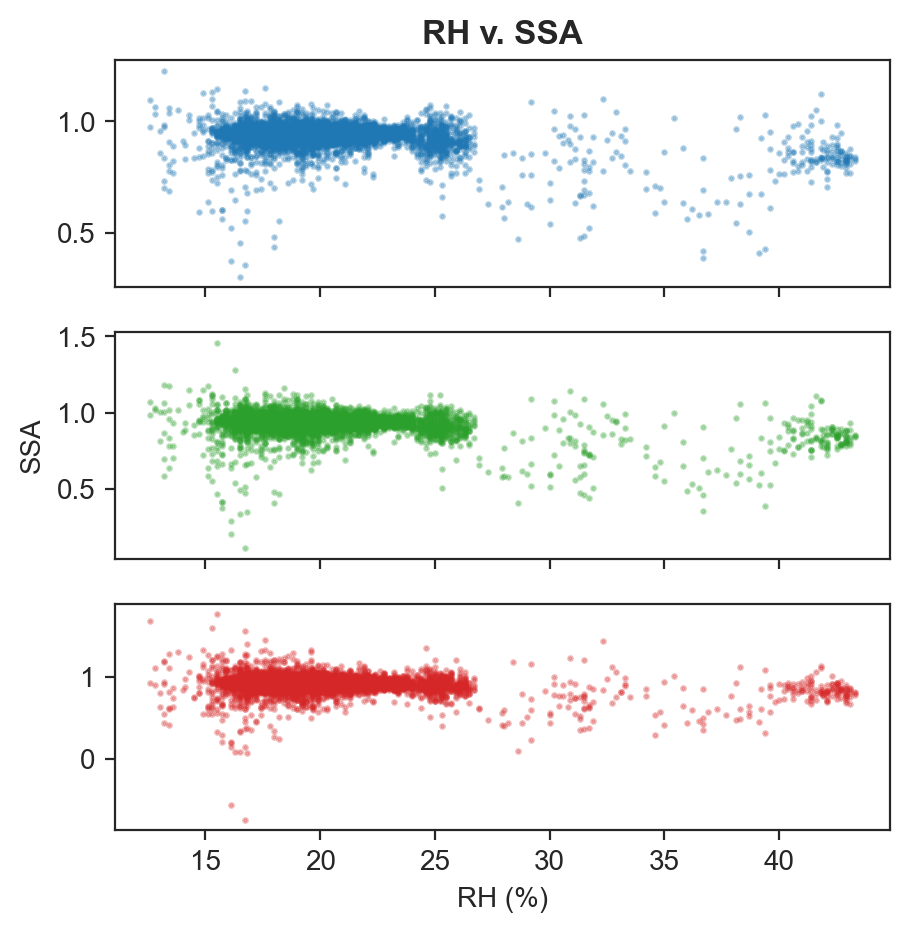

In [34]:
fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, figsize = (5,5))

ax.scatter(df['neph_R'], df['ssa_blue'], s = 2, alpha = 0.3, color = 'tab:blue')
ax2.scatter(df['neph_R'], df['ssa_green'], s = 2, alpha = 0.3, color = 'tab:green')
ax3.scatter(df['neph_R'], df['ssa_red'], s = 2, alpha = 0.3, color = 'tab:red')

ax2.set_ylabel('SSA')

ax3.set_xlabel('RH (%)')
ax.set_title('RH v. SSA', weight = 'bold')

## Clear versus Non-clear

Red varies the most because it is most sensitive, while blue is the most precise.

In [35]:
df_clear = df[df.F_cld == 0] # Cloud free
df_cloud = df[df.F_cld == 1] # Cloudy

Text(0.5, 1.0, 'Blue (p =  0.02)')

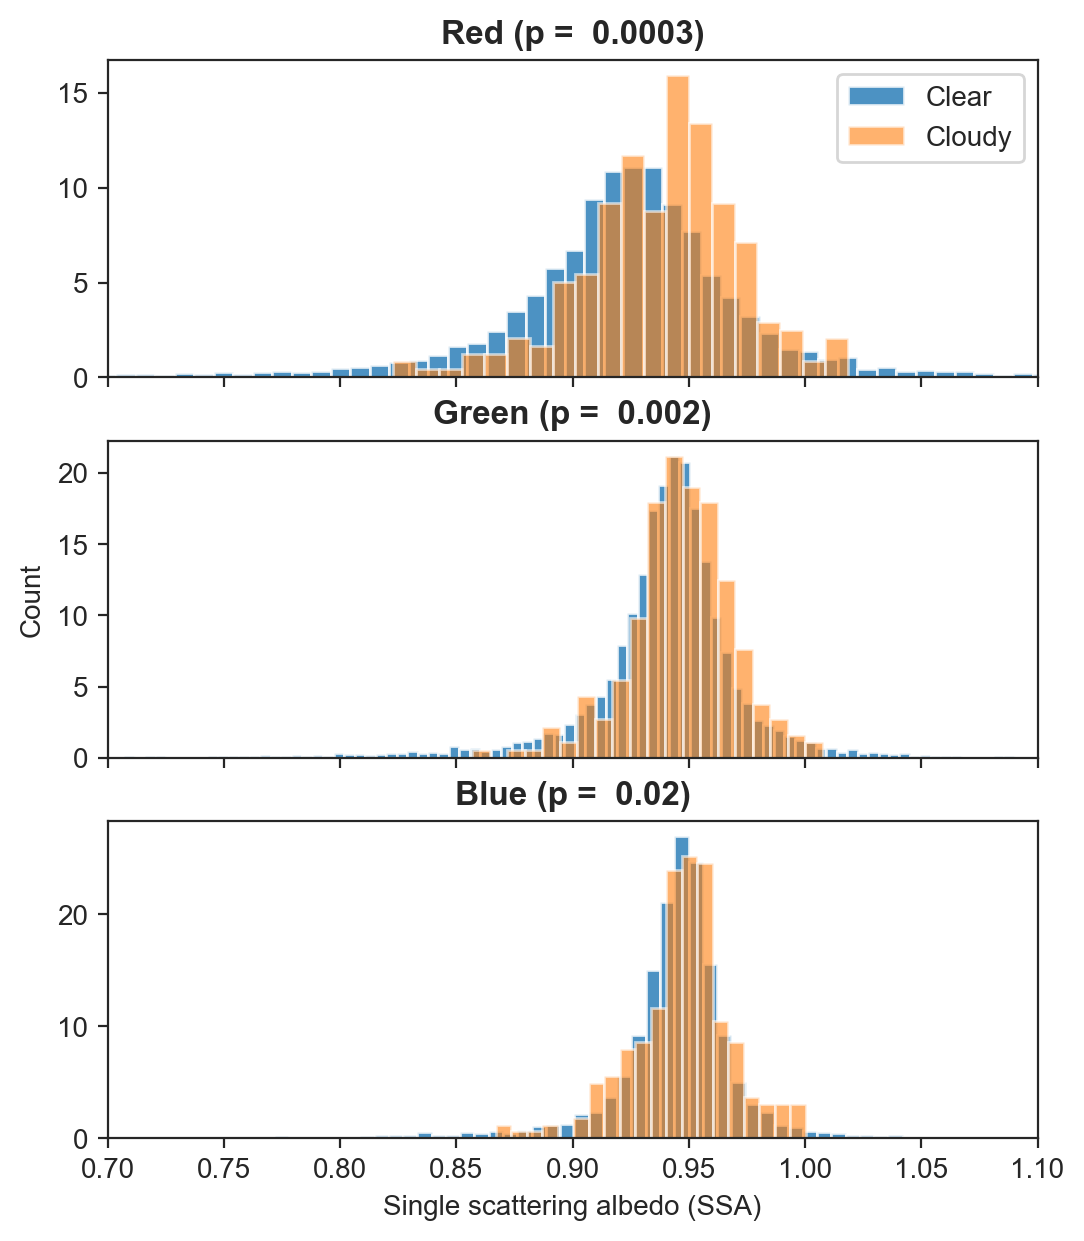

In [48]:
from scipy.stats import ttest_ind

fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, figsize = (6, 7))

ax.hist(df_clear['ssa_red'], bins = 300, alpha = 0.8, density = True, label = 'Clear');
ax.hist(df_cloud['ssa_red'], bins = 20, alpha = 0.6, density = True, label = 'Cloudy');

result_red = ttest_ind(df_clear['ssa_red'], df_cloud['ssa_red'], nan_policy = 'omit')

ax.legend()
ax.set_xlim([0.5, 1.1])

ax2.hist(df_clear['ssa_green'], bins = 300, alpha = 0.8, density = True, label = 'Clear');
ax2.hist(df_cloud['ssa_green'], bins = 20, alpha = 0.6, density = True, label = 'Cloudy');
result_green = ttest_ind(df_clear['ssa_green'], df_cloud['ssa_green'], nan_policy = 'omit')

ax3.hist(df_clear['ssa_blue'], bins = 150, alpha = 0.8, density = True, label = 'Clear');
ax3.hist(df_cloud['ssa_blue'], bins = 20, alpha = 0.6
         , density = True, label = 'Cloudy');
result_blue = ttest_ind(df_clear['ssa_blue'], df_cloud['ssa_blue'], nan_policy = 'omit')


ax3.set_xlabel('Single scattering albedo (SSA)')

ax2.set_ylabel('Count')
ax.set_xlim([0.7, 1.1])
ax.set_title(f'Red (p = {result_red.pvalue : .1})', weight = 'bold')
ax2.set_title(f'Green (p = {result_green.pvalue : .1})', weight = 'bold')
ax3.set_title(f'Blue (p = {result_blue.pvalue : .1})', weight = 'bold')